# Logistic Regression, Decision Tree, KNN

## 1 - Data Preprocessing

### 1.1 - Load the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/campus_placement.csv")
df.tail()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [4]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


### 1.2 - Handling missing values

In [5]:
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


### 1.3 - Encode Categorical Features

In [6]:
# Find the Categary columns
categary_columns = []
for i in df.select_dtypes(include = "O").columns:
  categary_columns.append(i)
categary_columns

['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

In [7]:
# Compare its values
df[categary_columns].head()

,ExtracurricularActivities,PlacementTraining,PlacementStatus
0,No,No,NotPlaced
1,Yes,Yes,Placed
2,Yes,No,NotPlaced
3,Yes,Yes,Placed
4,Yes,Yes,Placed


In [8]:
# Encode these categary Columns into Numeric Columns
for i in categary_columns:
  df[i] = df[i].map({"Yes" : 1, "No" : 0, "NotPlaced" : 0, "Placed" : 1})
df[categary_columns].head()

,ExtracurricularActivities,PlacementTraining,PlacementStatus
0,0,0,0
1,1,1,1
2,1,0,0
3,1,1,1
4,1,1,1


### 1.4 - Feature Selection

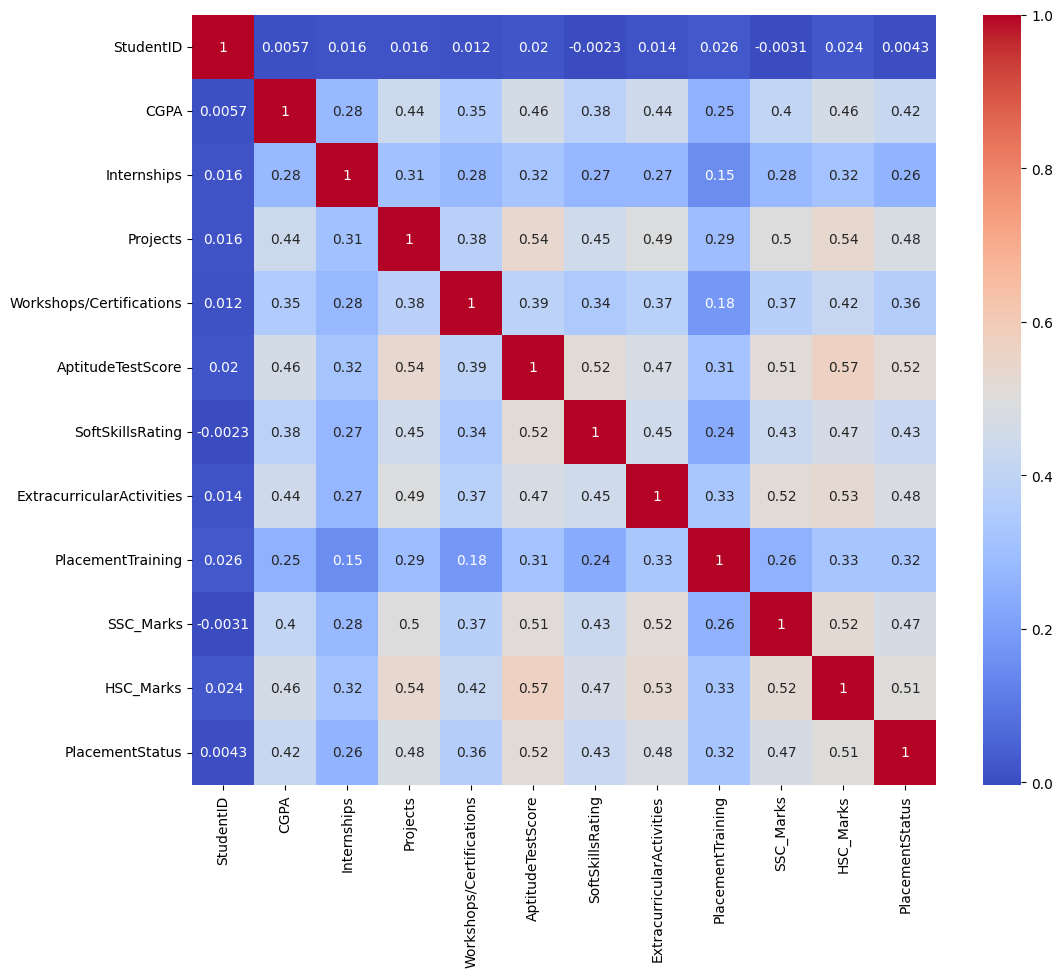

In [9]:
# let us see the figure
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")
plt.show()

In [10]:
# Select Top features
df.corr()["PlacementStatus"].sort_values(ascending = False)


,PlacementStatus
PlacementStatus,1.000000
AptitudeTestScore,0.521744
HSC_Marks,0.505746
ExtracurricularActivities,0.482491
Projects,0.475186
SSC_Marks,0.469763
SoftSkillsRating,0.427284
CGPA,0.423131
Workshops/Certifications,0.362268
PlacementTraining,0.323659


In [11]:
# Now Select Feature And Target
top_features = ["AptitudeTestScore", "HSC_Marks", "ExtracurricularActivities", "Projects"]
target = "PlacementStatus"

X = df[top_features]
y = df[target]

### 1.5 - Data Splitting

In [12]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train shape\t : {X_train.shape}")
print(f"X_test shape\t : {X_test.shape}")
print(f"y_train shape\t : {y_train.shape}")
print(f"y_test shape\t : {y_test.shape}")

X_train shape	 : (8000, 4)
X_test shape	 : (2000, 4)
y_train shape	 : (8000,)
y_test shape	 : (2000,)


### 1.6 - Feature Scaling

In [13]:
# Now Scale the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Training Set
X_train_scaled = scaler.fit_transform(X_train)
# Test Set
X_test_scaled = scaler.fit_transform(X_test)

## 2 - Logistic Regression - Model Building and Evaluation

### 2.1 - Model Building:

In [14]:
# Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 300)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=300)

### 2.2 - Model Evaluation

In [15]:
# Evaluate the Model
from sklearn.metrics import accuracy_score
y_pred_LR = lr.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f"Accuracy : {accuracy_LR}")

Accuracy : 0.7865



## 3 - Decision Tree - Model Building and Evaluation

### 3.1 - Model Building

In [16]:
# Build decision tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### 3.2 - Model Evaluation

In [17]:
# Model Evaluation
y_pred_DT = clf.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy Score for Decision Tree - {accuracy_DT}")

Accuracy Score for Decision Tree - 0.777


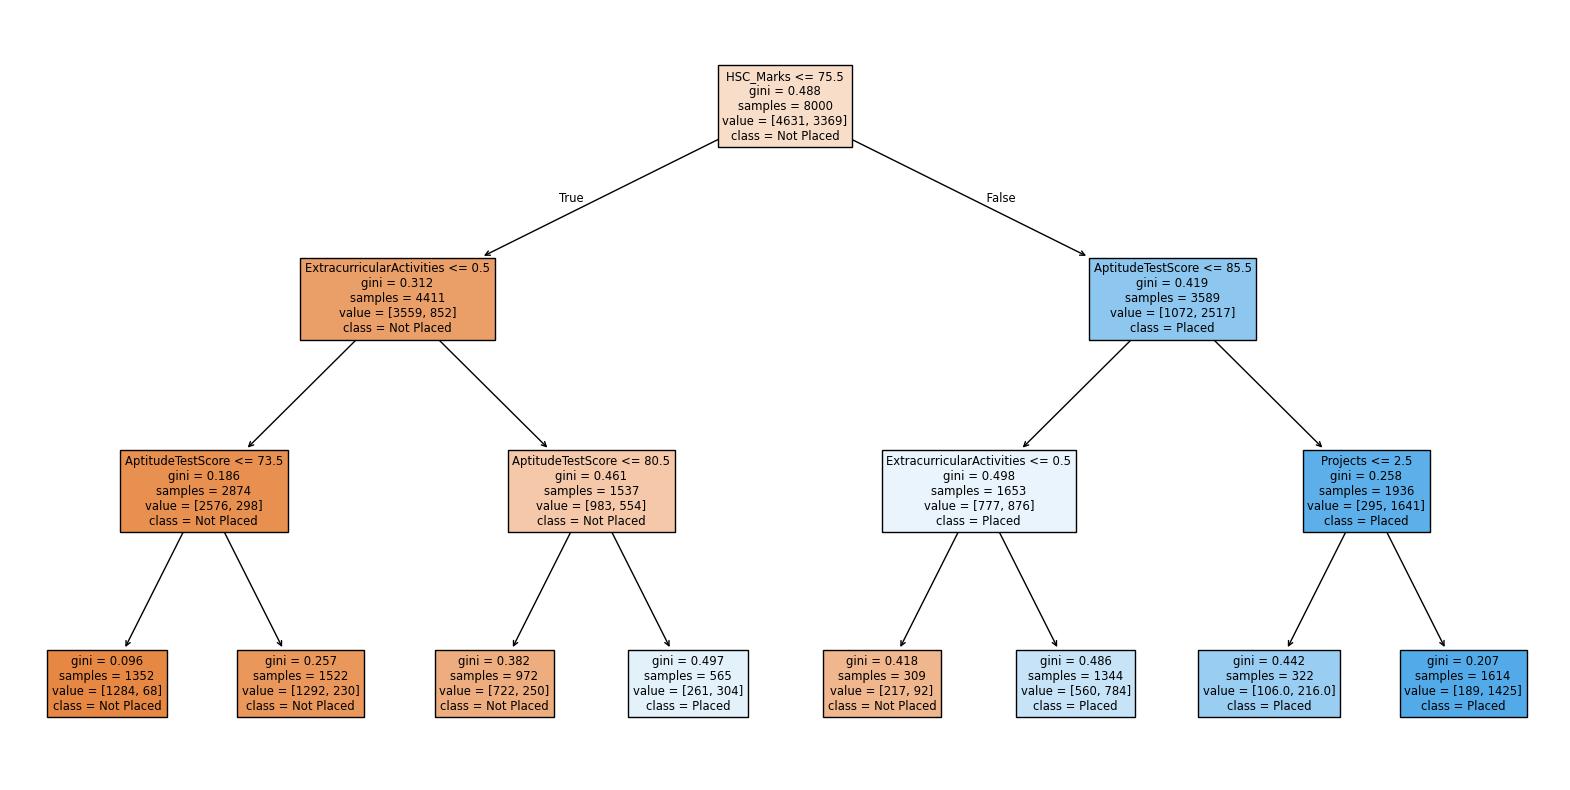

In [18]:
# Now We can see the visual
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 10))
plot_tree(clf, feature_names = X.columns, filled = True, class_names = ["Not Placed", "Placed"])
plt.show()

## 4 - K-Nearest Neighbors (KNN) - Model Building and Evaluation

### 4.1 - Model Building

In [19]:
# Build the KNeighbor Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 4.2 - Model Evaluation

In [23]:
# Evaluate the model
accuracy_knn = []
for i in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  accuracy_knn.append(score)
accuracy_knn

[0.722, 0.7315, 0.7245, 0.7395, 0.741, 0.747, 0.7485, 0.751, 0.752, 0.754]

### 4.3 - Reporting

In [22]:
# Report
for i, score in enumerate(accuracy_knn, start = 1):
  print(f"for k = {i}, accuracy = {score}")

for k = 1, accuracy = 0.722
for k = 2, accuracy = 0.7315
for k = 3, accuracy = 0.7245
for k = 4, accuracy = 0.7395
for k = 5, accuracy = 0.741
for k = 6, accuracy = 0.747
for k = 7, accuracy = 0.7485
for k = 8, accuracy = 0.751
for k = 9, accuracy = 0.752
for k = 10, accuracy = 0.754


In [24]:
mean_of_accuracy = np.mean(accuracy_knn)
print(f"Mean Accuracy : {mean_of_accuracy}")

Mean Accuracy : 0.7411


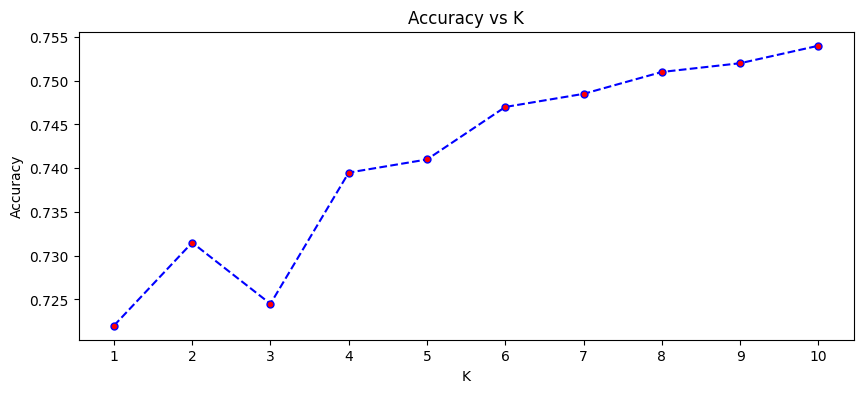

In [21]:
plt.figure(figsize = (10, 4))
plt.plot(range(1, 11), accuracy_knn, marker = "o", color = "blue", markersize = 5, markerfacecolor = "red", linestyle = "dashed")
plt.xticks(range(1, 11))
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

## 5 - Comparison and Analysis

<h4>1 - Accuracy scores of 3 models</h4>

|No.|Models|Accuracy|
|--------|---------|------|
|1 |Logistic Regression| 0.7865|
|2| Decision Tree       |0.777|
|3 |K-Nearest Neighbors| 0.7411|

<br>

<h4>2 - Discussions based on Accuracy scores</h4>

*    Logistic Regression is a best model compare than others.
*    Then it's accuracy is higher.
*    It takes quick time to anaylize.

<br>

<h4>3 - Strength and Weakness</h4>

|Strength |Weakness|
|------|-----|
|Simple and Fast | Not supported for all |
|Doesn't Overfit| Limited to capturing linear|
|Suitable foe smaller dataset|Not required for Large dataset


